In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [51]:
img = cv2.imread('./lena.png')
img_flat = np.reshape(img, (-1,3))

# Implement histogram equalization algorithm 
hist_r = np.zeros(256)
hist_g = np.zeros(256)
hist_b = np.zeros(256)

for i in range(len(img_flat)):
        hist_r[img_flat[i][0]]+=1
        hist_g[img_flat[i][1]]+=1
        hist_b[img_flat[i][2]]+=1

cdf = np.zeros((256,3))
hists = [hist_r,hist_g,hist_b]

for channel in range(3): #rgb channel
    cdf[:,channel] = np.cumsum(hists[channel])
    cdf[:, channel] = cdf[:,channel]*255 / cdf[-1][channel]

new_img_flat = np.zeros_like(img_flat)
for channel in range(3):
    new_img_flat[:,channel] = cdf[img_flat[:,channel], channel]
    
new_img = np.reshape(new_img_flat, np.shape(img))

In [62]:
# Same algorithm using cv2 built-in function 

b,g,r = cv2.split(img)

eq_b = cv2.equalizeHist(b)
eq_g = cv2.equalizeHist(g)
eq_r = cv2.equalizeHist(r)

cv2_img = cv2.merge((eq_b,eq_g,eq_r))


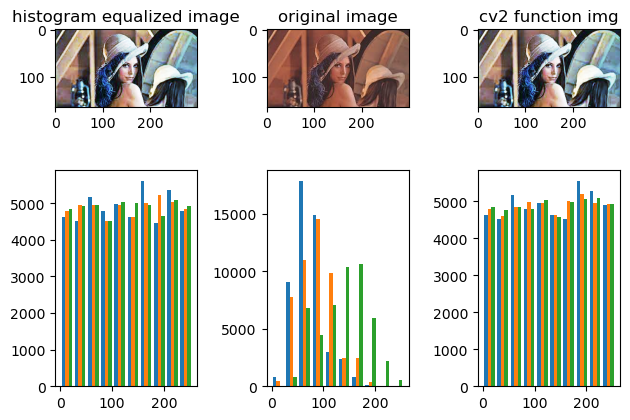

In [63]:
plt.figure()

plt.subplot(231)
plt.imshow(new_img[:,:,[2,1,0]])
plt.title("histogram equalized image")
plt.subplot(232)
plt.imshow(img[:,:,[2,1,0]])
plt.title("original image")
plt.subplot(233)
plt.title("cv2 function img")
plt.imshow(cv2_img[:,:,[2,1,0]])

plt.subplot(234)
plt.hist(new_img_flat)
plt.subplot(235)
plt.hist(img_flat)
plt.subplot(236)
plt.hist(np.reshape(cv2_img, (-1,3)))

# plt.legend()
plt.tight_layout()